In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_chisquare
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import norm,stats
import numpy as np

In [35]:
pretest = pd.read_csv('pretest.csv')
tests = pd.read_csv('test.csv')

#Set the date to datetime
pretest['date'] = pd.to_datetime(pretest['date'])
tests['date'] = pd.to_datetime(tests['date'])

C:\Users\HP\AppData\Local\Temp\ipykernel_11048\1739136593.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  pretest = pd.read_csv('pretest.csv')


In [36]:
#Display the first five rows
pretest.head()

,visitor_id,date,email,experiment,group,submitted
0,1,2021-12-01,NaN,NaN,NaN,0
1,2,2021-12-01,NaN,NaN,NaN,0
2,3,2021-12-01,NaN,NaN,NaN,0
3,4,2021-12-01,NaN,NaN,NaN,0
4,5,2021-12-01,NaN,NaN,NaN,0


In [37]:
#showing some stats about the preset_dataset.

#How many rows are in the table?

#What is the date range of the date field in the table?

print('# of rows:',pretest.shape[0])
print('Date Range:', pretest.date.min(), '-', pretest.date.max())

# of rows: 309903
Date Range: 2021-12-01 00:00:00 - 2021-12-31 00:00:00


In [38]:
#check missing values.
pretest.isnull().sum()/ len(pretest) * 100

visitor_id     0.000000
date           0.000000
email         89.901679
experiment    90.306967
group         90.306967
submitted      0.000000
dtype: float64

In [39]:
#Let's get some data about the performance of pretest

# A. How many visitors were there?

# B. How many signups were there?

# C. What was the signup rate?

print('Total visitors count', pretest.visitor_id.count())
print('Total signup count', pretest.submitted.sum())
print('Total signup rate', pretest.submitted.mean().round(2))

Total visitors count 309903
Total signup count 31295
Total signup rate 0.1


# Plot Visitors Per day

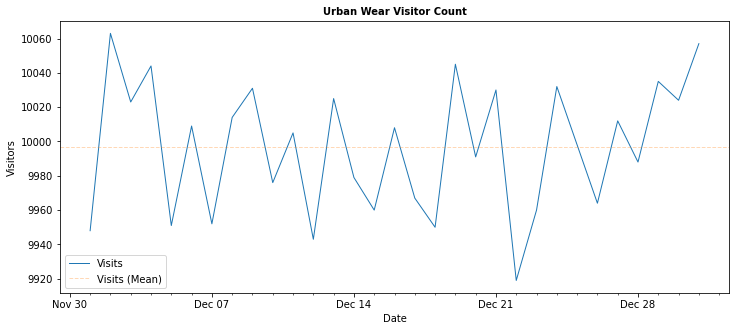

In [40]:
# Set the color palette for the plot
colors = sns.color_palette()
c1, c2 = colors[0], colors[1]

# Example: Replace `df` with your dataset variable
# Assuming `df` has columns 'date' and 'submitted'

# Count sign-ups by date
visits_per_day = pretest.groupby('date')['submitted'].count()
visits_mean = visits_per_day.mean()

# Plot data
plt.figure(figsize=(12, 5))
plt.plot(visits_per_day.index, visits_per_day, color=c1, linewidth=1, label='Visits')
plt.axhline(visits_mean, color=c2, linestyle='--', linewidth=1, alpha=0.3, label='Visits (Mean)')

# Format plot
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))  # Adjust interval as needed
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_minor_locator(mdates.DayLocator())

plt.title('Urban Wear Visitor Count', fontsize=10, weight='bold')
plt.ylabel('Visitors', fontsize=10)
plt.xlabel('Date', fontsize=10)
plt.legend()

plt.show()

# Plot Signups

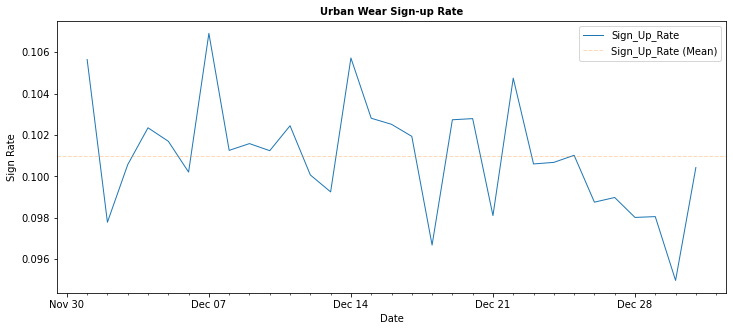

In [41]:
# Set the color palette for the plot
colors = sns.color_palette()
c1, c2 = colors[0], colors[1]

# Count sign-ups by date
signup_rate_per_day = pretest.groupby('date')['submitted'].mean()
signup_rate_mean = signup_rate_per_day.mean()

# Plot data
plt.figure(figsize=(12, 5))
plt.plot(signup_rate_per_day.index, signup_rate_per_day, color=c1, linewidth=1, label='Sign_Up_Rate')

# Fix: Use correct mean variable
plt.axhline(signup_rate_mean, color=c2, linestyle='--', linewidth=1, alpha=0.3, label='Sign_Up_Rate (Mean)')

# Format plot
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))  # Adjust interval as needed
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_minor_locator(mdates.DayLocator())

plt.title('Urban Wear Sign-up Rate', fontsize=10, weight='bold')
plt.ylabel('Sign Rate', fontsize=10)
plt.xlabel('Date', fontsize=10)
plt.legend()

plt.show()

# State the Hypothesis

The second step of this experiment is to state the hypothesis. The next step will be to state the parameter for the experiment.
> * This includes (Significance level, statistical power, MDE)
> * **Ho**: The signup rates for the blue and green button are the same
> * **Ha**: The signup rates for the blue and green button are different.

In [42]:
# The Experiment parameters
alpha = 0.05 # Set the probability threshold at 0.05. if p-value cross this thresshold we reject the null hypothesis.
power = 0.80 # Ensures that, there is an 80% chance of detecting an effect with significance.
mde = 0.10 # Detect a 20% improvement in signup rate with statistical significance.

# proportion of the effect needed
p1 = 0.10
p2 = p1 * (1 + p1)

# Step three - Design the Experiment
The third step of the experiment is the design phase, which involves determining the randomization unit, calculating the sample size, and determining the experiment duration. We will explore how to calculate the sample size and experiment duration in this section.

To detect an effect of 10.0% lift from the pretest sign-up at 10%, the sample size per group required is 15000.
The total sample required in the experiment is 30000.


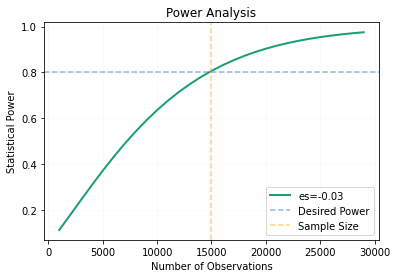

In [43]:
import statsmodels.stats.api as sm
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.power import TTestIndPower

# Calculate the effect size using Cohen's D
cohen_D = sm.proportion_effectsize(p1, p2)

# Estimate the sample size required per group
ttest_power = TTestIndPower()
n = ttest_power.solve_power(effect_size=cohen_D, power=0.8, alpha=alpha)
n = int(round(n, -3))  # Round up to the nearest thousand

print(f"To detect an effect of {100 * (p2/p1 - 1):.1f}% lift from the pretest sign-up at {100 * p1:.0f}%, "
      f"the sample size per group required is {n}."
      f"\nThe total sample required in the experiment is {2 * n}.")

# Explore power across sample sizes
ttest_power.plot_power(dep_var='nobs', nobs=np.arange(1000, 30000, 1000),
                       effect_size=[cohen_D], title='Power Analysis')

# Set plot parameters
plt.axhline(0.8, linestyle='--', label='Desired Power', alpha=0.5)
plt.axvline(n, linestyle='--', color='orange', label='Sample Size', alpha=0.5)
plt.ylabel('Statistical Power')
plt.grid(alpha=0.08)
plt.legend()

plt.show()

# Experiment Duration

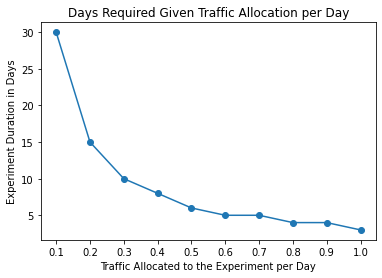

In [44]:
from matplotlib.ticker import MultipleLocator

# What's the duration required to achieve the required sample size
# given the percentage of unique visitors allocated to the experiment?

alloc = np.arange(0.10, 1.1, 0.10)  # Allocation percentages from 10% to 100%
size = round(visits_mean, -3) * alloc  # Adjust sample size based on allocation
days = np.ceil(2*n/ size)  # Compute required duration in days

# Generate plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(alloc, days, 'o-')

# Set x-axis major locator
ax.xaxis.set_major_locator(MultipleLocator(0.1))

# Set labels and title
ax.set_title('Days Required Given Traffic Allocation per Day')
ax.set_ylabel('Experiment Duration in Days')
ax.set_xlabel('Traffic Allocated to the Experiment per Day')

# Show the plot
plt.show()

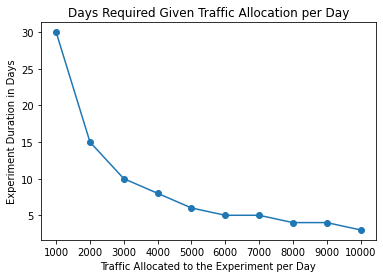

In [45]:
# What's the duration required to achieve the required sample size
# given the number of unique visitors allocated to the experiment?

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(size, days, 'o-')

ax.xaxis.set_major_locator(MultipleLocator(1000))  # Set major locator for x-axis

ax.set_title('Days Required Given Traffic Allocation per Day')
ax.set_ylabel('Experiment Duration in Days')
ax.set_xlabel('Traffic Allocated to the Experiment per Day')

plt.show()

In [46]:
# Display the number of users required per day in an experiment given the experiment duration.
print(f'For a 21-day experiment, {np.ceil(n * 2 / 21)} users are required per day.')  # Too long to wait
print(f'For a 14-day experiment, {np.ceil(n * 2 / 14)} users are required per day.')  # Sweet spot between risk and time
print(f'For a 7-day experiment, {np.ceil(n * 2 / 7)} users are required per day.')  # Too risky

For a 21-day experiment, 1429.0 users are required per day.
For a 14-day experiment, 2143.0 users are required per day.
For a 7-day experiment, 4286.0 users are required per day.


# Run The Experiment

In [47]:
# Get the subset tables of control and treatment results
AB_test = tests[tests.experiment == 'email_test']
control_signups = AB_test[AB_test.group == 0]['submitted']
treatment_signups = AB_test[AB_test.group == 1]['submitted']

# Get stats
AB_control_cnt = control_signups.sum()         # Control Sign-up Count
AB_treatment_cnt = treatment_signups.sum()     # Treatment Sign-up Count
AB_control_rate = control_signups.mean()       # Control Sign-up Rate
AB_treatment_rate = treatment_signups.mean()   # Treatment Sign-up Rate
AB_control_size = control_signups.count()      # Control Sample Size
AB_treatment_size = treatment_signups.count()  # Treatment Sample Size

# Show calculations
print(f'Control Sign-Up Rate: {AB_control_rate:.4f}')
print(f'Treatment Sign-Up Rate: {AB_treatment_rate:.4f}')

Control Sign-Up Rate: 0.0956
Treatment Sign-Up Rate: 0.1078


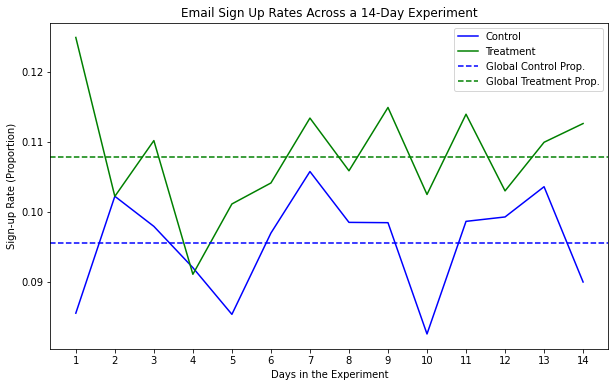

In [48]:
# Calculate the sign-up rates per date
signup_per_day = AB_test.groupby(['group', 'date'])['submitted'].mean()
ctrl_props = signup_per_day.loc[0]
trt_props = signup_per_day.loc[1]

# Get the day range of experiment
exp_days = range(1, AB_test['date'].nunique() + 1)

# Let's display the sign-up rate per experiment day
f, ax = plt.subplots(figsize=(10, 6))

# Generate plots
ax.plot(exp_days, ctrl_props, label='Control', color='b')
ax.plot(exp_days, trt_props, label='Treatment', color='g')
ax.axhline(AB_control_rate, label='Global Control Prop.', linestyle='--', color='b')
ax.axhline(AB_treatment_rate, label='Global Treatment Prop.', linestyle='--', color='g')

# Format plot
ax.set_xticks(exp_days)
ax.set_title('Email Sign Up Rates Across a 14-Day Experiment')
ax.set_ylabel('Sign-up Rate (Proportion)')
ax.set_xlabel('Days in the Experiment')
ax.legend()

# Assess Validity Checks
In this step, we will check for two of the checks for validity threats, which involve the AA test and the chi-square test for sample ratio mismatch (SRM).

Conducting checks for the experiment ensures that the AB test result is trustworthy and reduces risk of committing type 1 or 2 errors.

We run an AA test to ensure that there is no underlying difference between the control and treatment to begin with. Note that in an actual experiment, AA test would be conducted prior to the AB test.

We run a chi-square test on group sizes to check for sample-ratio mismatch (SRM). This test ensures that the randomization algorithm worked.

There are other potential checks that could be performed including segmentation analysis to perform novelty checks and such.

But, for this exercise, we will keep it simple to just two checks.

In [49]:
# Let's conduct an AA test

# Filter on visitors in the AA test
AA_test = pretest[pretest.experiment == 'AA_test']

# Grab the control and treatment groups in the AA test
AA_control = AA_test[AA_test.group == 0]['submitted']
AA_treatment = AA_test[AA_test.group == 1]['submitted']

# Get stats
AA_control_cnt = AA_control.sum()
AA_treatment_cnt = AA_treatment.sum()
AA_control_rate = AA_control.mean()
AA_treatment_rate = AA_treatment.mean()
AA_control_size = AA_control.count()
AA_treatment_size = AA_treatment.count()

# Show calculation
print('\n-------- AA Test ----------')
print(f'Control Sign-Up Rate: {AA_control_rate:.3f}')
print(f'Treatment Sign-Up Rate: {AA_treatment_rate:.3f}')



-------- AA Test ----------
Control Sign-Up Rate: 0.101
Treatment Sign-Up Rate: 0.099


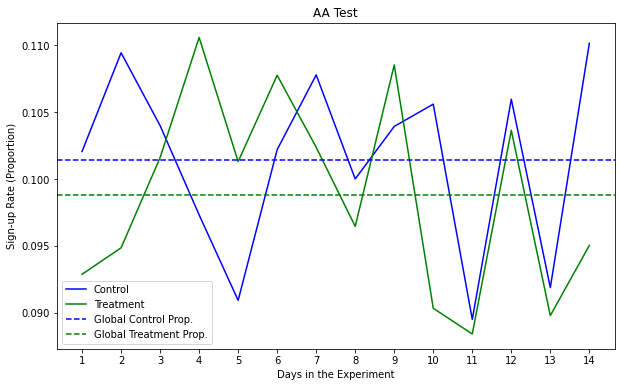

In [50]:
# Sign-up rates per date
AA_signup_per_day = AA_test.groupby(['group', 'date'])['submitted'].mean()
AA_ctrl_props = AA_signup_per_day.loc[0]
AA_trt_props = AA_signup_per_day.loc[1]

# Get the day range of experiment
exp_days = range(1, AA_test['date'].nunique() + 1)

# Let's display the sign-up rate per experiment day
f, ax = plt.subplots(figsize=(10, 6))

# Generate plots
ax.plot(exp_days, AA_ctrl_props, label='Control', color='b')
ax.plot(exp_days, AA_trt_props, label='Treatment', color='g')
ax.axhline(AA_control_rate, label='Global Control Prop.', linestyle='--', color='b')
ax.axhline(AA_treatment_rate, label='Global Treatment Prop.', linestyle='--', color='g')

# Format plot
ax.set_xticks(exp_days)
ax.set_title('AA Test')
ax.set_ylabel('Sign-up Rate (Proportion)')
ax.set_xlabel('Days in the Experiment')
ax.legend()

plt.show()

In [51]:
# Execute test
AA_chistats, AA_pvalue, AA_tab = proportions_chisquare(
    [AA_control_cnt, AA_treatment_cnt],
    nobs=[AA_control_size, AA_treatment_size]
)

# Grab dates
first_date = AA_test['date'].min().date()
last_date = AA_test['date'].max().date()

# Set the ALPHA for the AA test
AA_ALPHA = 0.05

# Display results
print(f'\n--------- AA Test ({first_date} - {last_date}) ----------\n')
print('Ho: The sign-up rates between blue and green are the same.')
print('Ha: The sign-up rates between blue and green are different.\n')
print(f'Significance level: {AA_ALPHA}\n')

print(f'Chi-Square = {AA_chistats:.3f} | P-value = {AA_pvalue:.3f}')

print('\nConclusion:')
if AA_pvalue < AA_ALPHA:
    print('Reject Ho and conclude that there is statistical significance in the difference between the two groups. Check for instrumentation errors.')
else:
    print('Fail to reject Ho. Therefore, proceed with the AB test.')



--------- AA Test (2021-12-18 - 2021-12-31) ----------

Ho: The sign-up rates between blue and green are the same.
Ha: The sign-up rates between blue and green are different.

Significance level: 0.05

Chi-Square = 0.577 | P-value = 0.448

Conclusion:
Fail to reject Ho. Therefore, proceed with the AB test.


In [54]:
# Let's check for sample ratio mismatch (SRM)

# Set test param
SRM_ALPHA = 0.05

# Get the observed and expected counts in the experiment
email_test = tests[tests.experiment == 'email_test']
observed = email_test.groupby(['group'])['experiment'].count().values
expected = [email_test.shape[0] * 0.5] * 2

# Perform Chi-Square Goodness of Fit Test
chi_stats, pvalue = stats.chisquare(f_obs=observed, f_exp=expected)

print('\n------ A Chi-Square Test for SRM ------\n')
print('Ho: The ratio of samples is 1:1.')
print('Ha: The ratio of samples is not 1:1.\n')
print(f'Significance level: {SRM_ALPHA}\n')

print(f'Chi-Square = {chi_stats:.3f} | P-value = {pvalue:.3f}')

print('\nConclusion:')
if pvalue < SRM_ALPHA:
    print('Reject Ho and conclude that there is statistical significance in the ratio of samples not being 1:1. Therefore, there is SRM.')
else:
    print('Fail to reject Ho. Therefore, there is no SRM.')



------ A Chi-Square Test for SRM ------

Ho: The ratio of samples is 1:1.
Ha: The ratio of samples is not 1:1.

Significance level: 0.05

Chi-Square = 1.290 | P-value = 0.256

Conclusion:
Fail to reject Ho. Therefore, there is no SRM.


C:\Users\HP\AppData\Local\Temp\ipykernel_11048\3941599330.py:12: DeprecationWarning: Please use `chisquare` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  chi_stats, pvalue = stats.chisquare(f_obs=observed, f_exp=expected)


# Statistical Inference

In this step we will walk through the procedure of applying statistical tests on the email sign-up AB test.
We will take a look at Chi-Squared and T-Test to evaluate the results from the experiment.
Though, in real life, only one of the tests is sufficient, for learning, it’s useful to compare and contrast the result from both.

In [ ]:
# Float: AB_ALPHA
AB_ALPHA = 0.05

In [ ]:
# Let's start with the chi-squared test

# Execute test
AB_chistats, AB_pvalue, AB_tab = proportions_chisquare(
    [AB_control_cnt, AB_treatment_cnt],
    nobs=[AB_control_size, AB_treatment_size]
)

# Grab dates
first_date = AB_test['date'].min().date()
last_date = AB_test['date'].max().date()

# Run results
print(f'\n--------- AB Test Email Sign-Ups ({first_date} - {last_date}) ---------\n')
print('Ho: The sign-up rates between blue and green are the same.')
print('Ha: The sign-up rates between blue and green are different.\n')
print(f'Significance level: {AB_ALPHA}\n')

print(f'Chi-Square = {AB_chistats:.3f} | P-value = {AB_pvalue:.3f}')

print('\nConclusion:')
if AB_pvalue < AB_ALPHA:
    print('Reject Ho and conclude that there is statistical significance in the difference of sign-up rates between blue and green buttons.')
else:
    print('Fail to reject Ho. Therefore, proceed with the AB test.')

In [ ]:
# import statsmodels.api as sm

# Filter data
AB_test = tests[tests.experiment == 'email_test']
AB_control_signups = AB_test[AB_test.group == 0]['submitted']
AB_treatment_signups = AB_test[AB_test.group == 1]['submitted']

# Run T-Test
t_stat, pvalue_ab, ab_df = sm.stats.ttest_ind(
    AB_treatment_signups,
    AB_control_signups,
    alternative='two-sided',
    usevar='pooled'
)

# Dates
first_date = AB_test['date'].min().date()
last_date = AB_test['date'].max().date()

# Print results
print(f'\n--------- AB Test Email Sign-Ups ({first_date} - {last_date}) ---------\n')
print('Ho: The sign-up rates between blue and green are the same.')
print('Ha: The sign-up rates between blue and green are different.\n')
print(f'Significance level: {AB_ALPHA}\n')
print(f'T-Statistic = {t_stat:.3f} | P-value = {pvalue_ab:.3f}')

print('\nConclusion:')
if pvalue_ab < AB_ALPHA:
    print('Reject Ho and conclude that there is statistical significance in the difference of sign-up rates between blue and green buttons.')
else:
    print('Fail to reject Ho.')


In [ ]:
# Values
x = np.array([AB_treatment_cnt, AB_control_cnt])
n = np.array([AB_treatment_size, AB_control_size])

# Z-test (just to reuse standard error)
z_stat, p_value = proportions_ztest(x, n)

# Compute pooled probability and SE
p1 = AB_treatment_cnt / AB_treatment_size
p2 = AB_control_cnt / AB_control_size
diff = p1 - p2

# Standard error for difference in proportions
se = np.sqrt(p1 * (1 - p1) / AB_treatment_size + p2 * (1 - p2) / AB_control_size)

# Confidence interval (95%)
z = norm.ppf(1 - 0.05/2)
lower = diff - z * se
upper = diff + z * se

# Relative lift
lower_lift = lower / AB_control_rate
upper_lift = upper / AB_control_rate

In [ ]:
print('\n--------- Sample Sizes ----------')
print(f'Control: {AB_control_size:,}')
print(f'Treatment: {AB_treatment_size:,}')

print('\n--------- Sign-Up Counts (Raw) ----------')
print(f'Control: {AB_control_cnt:,} ({AB_control_rate*100:.1f}%)')
print(f'Treatment: {AB_treatment_cnt:,} ({AB_treatment_rate*100:.1f}%)')

print('\n--------- Differences ----------')
print(f'Absolute diff: {diff:.4f}')
print(f'Relative lift: {(diff / AB_control_rate) * 100:.1f}%')

print('\n--------- Confidence Intervals ----------')
print(f'Diff CI: ({lower:.4f}, {upper:.4f})')
print(f'Relative lift CI: ({lower_lift*100:.1f}%, {upper_lift*100:.1f}%)')

# Step 7 – Decide Whether to Launch
> . In the email sign-up test for the Urban Wear pre-launch page, we aimed to improve the sign-up rate by changing the submit button color from blue to green.

> .We ran a two-week randomized controlled experiment (02/01/2022 – 02/14/2022) that enrolled a sample of users into the control (blue) and treatment (green) groups.

> .From the test, we observed an improvement of 12.8% lift from the benchmark (blue) at 9.5%. The result was statistically significant with a 95% confidence interval of 5.7% and 19.9%.

> .Given that we observed practical and statistical significance, our recommendation is to launch the new submit button in green.